# Pratiques d'écoutes musicales et omnivorisme culturel
Projet Python pour la Data Science de Ribeiro Morgane et Ley Juline

### INTRODUCTION

blablabla

### SOMMAIRE 
* [Installation](#Install)

* [Préparation des données](#prepa)


## Installation <a class="anchor" id="Install"></a>



In [3]:
!pip install -r requirements.txt --quiet

#Importations
import requests
import pandas as pd
import numpy as np
import statsmodels.api as sm
from prince import MCA
from sklearn.cluster import KMeans
from plotnine import *
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

#Fonctions
from scripts import fonctions


## Préparation des données <a class="anchor" id="prepa"></a>

Les données utilisées sont également disponibles ici : 

Pratiques d'écoute de musique en ligne - 2020 : https://www.data.gouv.fr/datasets/pratiques-decoute-de-musique-en-ligne-2020 

Consommation des contenus culturels et sportifs numériques - Baromètre : https://www.data.gouv.fr/datasets/consommation-des-contenus-culturels-et-sportifs-numeriques-barometre


### 1. Adresses 

In [4]:
url_barometre = "https://www.data.gouv.fr/api/1/datasets/r/aff9d702-db6d-46e5-8416-c032d8b9d89d"

url_musique = "https://www.data.gouv.fr/api/1/datasets/r/85d1feb0-76cc-4e84-96f4-169971db952e"


### 2. Chargement des données

In [5]:
fonctions.telecharger(url_barometre, "data_barometre.xlsx")
fonctions.telecharger(url_musique, "data_musique.xlsx")

df_barometre_brut = pd.read_excel("data_barometre.xlsx")
df_musique_brut = pd.read_excel("data_musique.xlsx")


Téléchargement réussi !
Téléchargement réussi !


### 3. Structure de la base de données - Baromètre


In [6]:
fonctions.analyser(df_barometre_brut)

'La base de données contient 5002 observations et 831 variables. Elle comprend 180 variables numériques, 651 variables de type texte, On observe 3185977 valeurs manquantes, soit 76.65% de l’ensemble des cellules, réparties sur 736 variables. Enfin, 175 variables sont constantes.'

### 3. Structure de la base de données - Pratique d'écoute de musique en ligne

In [7]:
fonctions.analyser(df_musique_brut)

'La base de données contient 2200 observations et 261 variables. Elle comprend 1 variables numériques, 260 variables de type texte, On observe 214 valeurs manquantes, soit 0.04% de l’ensemble des cellules, réparties sur 1 variables. Enfin, 2 variables sont constantes.'

On se rend compte en ouvrant la base de données que la part de valeurs manquantes est bien plus élevée que 0.04%. Un recodage de deux bases de données est donc nécessaire

### 4. Recodage des données - Baromètre

Le recodage va également nous permettre de trier les variables qui nous intéressent.

In [8]:
variables_barometre = [
    "SEXE", "AGE", "AGGLOIFOP2", "TYPCOM", "TAILCOM", "DPT", "REG3", "REG13", "PI4",
    "SITI", "PPIA", "RECPPIA", "STCA", "STATUT", "FOYER", "POIDS",
    #Q1 quel produit avez-vous consommé de manière dématérialisée ces 12 derniers mois ?
    "Q1_1", "Q1_2", "Q1_3", "Q1_4", "Q1_5", "Q1_6", "Q1_7", "Q1_8", "Q1_9", "Q1_10", "Q1_11", 
    #Q2 : à quelle fréquence ?
    "Q2_r1", "Q2_r2", "Q2_r3", "Q2_r4", "Q2_r5", "Q2_r6", "Q2_r7", "Q2_r8", "Q2_r9", "Q2_r10", "Q2_r11", 
    #Q2BIS : regardez-vous des vidéos de courtes durée proposées par Youtube?
    "Q2BIS",
    #Q3 : consommation légale ? (globalité)
    "Q3",
    #Q4 : consommation légale ? globalité dans le cadre des activités proposées question1
    "Q4",
    #Q5_r : consommation légale pour chaque activité
    "Q5_r1", "Q5_r2", "Q5_r3", "Q5_r4", "Q5_r5", "Q5_r6", "Q5_r7", "Q5_r8", "Q5_r9", "Q5_r10", "Q5_r11", 
    #Q6 : fréquence de conso illégale
    "Q6_r1", "Q6_r2", "Q6_r3", "Q6_r4", "Q6_r5", "Q6_r6", "Q6_r7", "Q6_r8", "Q6_r9", "Q6_r10", "Q6_r11", 
    #QBOL14 : comment découvrez-vous de nouveaux films ?
    "QBOL14_1", "QBOL14_2", "QBOL14_3", "QBOL14_4", "QBOL14_5", "QBOL14_6", "QBOL14_7", "QBOL14_8", "QBOL14_9", 
    #QBU1 : consommation payante ou gratuite ?
    "QBU1_r1", "QBU1_r2", "QBU1_r3", "QBU1_r4", "QBU1_r5", "QBU1_r6", "QBU1_r7", "QBU1_r8", "QBU1_r9", "QBU1_r10", "QBU1_r11", 
    #QBU7 : 3 principales raisons de ne pas consommer légalement
    "QBU7_r1_c1", "QBU7_r2_c1", "QBU7_r3_c1", "QBU7_r4_c1", "QBU7_r5_c1", "QBU7_r6_c1", "QBU7_r7_c1", "QBU7_r8_c1", "QBU7_r9_c1", "QBU7_r10_c1", "QBU7_r11_c1", "QBU7_r12_c1", "QBU7_r13_c1", "QBU7_r14_c1", "QBU7_r15_c1", "QBU7_r16_c1", 
    #RS14 : quel service avez vous accès pour écouter de la musique
    "RS14_1", "RS14_2", "RS14_3", "RS14_4", "RS14_5", "RS14_6", "RS14_7", "RS14_8", "RS14_9"
]

pratiques = ["mus","films","series","photos","jv","livres","logi","presse","retrans"]

df_barometre_cleaned = df_barometre_brut[variables_barometre]

df_barometre_cleaned.replace({"#NUL!": np.nan, "": np.nan, " ": np.nan}, inplace=True)
df_barometre_cleaned = df_barometre_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # retirer les espaces au début et à la fin des string pour le recodage au cas où

df_barometre_recode = pd.DataFrame([])

# Sexe
sexe_map = {"Une femme": 1, "Un homme": 0}
df_barometre_recode["sexe"] = df_barometre_cleaned["SEXE"].map(sexe_map)

df_barometre_recode["age"]=df_barometre_cleaned["AGE"]

agglo_map = {"MoinsDe100000Habitants":0, "PlusDe100000Habitants":1}
df_barometre_recode["plusde10000habitants"] = df_barometre_cleaned["AGGLOIFOP2"].map(agglo_map)


df_barometre_recode["commune_centreville"] = np.where(
    df_barometre_cleaned["TYPCOM"] == "VilleCentre", 1, 0)

df_barometre_recode["commune_rural"] = np.where(
    df_barometre_cleaned["TYPCOM"] == "Rural", 1, 0)

df_barometre_recode["commune_banlieue_sup"] = np.where(
    df_barometre_cleaned["TYPCOM"] == "BanlieueNVSup", 1, 0)

df_barometre_recode["commune_banlieue_modeste"] = np.where(
    df_barometre_cleaned["TYPCOM"] == "BanlieueNVModeste", 1, 0)

df_barometre_recode["commune_banlieue_inter"] = np.where(
    df_barometre_cleaned["TYPCOM"] == "BanlieueNVInterm", 1, 0)

df_barometre_recode["commune_isolee"] = np.where(
    df_barometre_cleaned["TYPCOM"] == "VilleIsolee", 1, 0)


df_barometre_recode["taille_commune"] = df_barometre_cleaned["TAILCOM"]

departements_dict = {
    "AIN": "01", "AISNE": "02", "ALLIER": "03", "ALPESDEHAUTESPROVENCE": "04",
    "HAUTESALPES": "05", "ALPESMARITIMES": "06", "ARDECHE": "07", "ARDENNES": "08",
    "ARIEGE": "09", "AUBE": "10", "AUDE": "11", "AVEYRON": "12", "BOUCHESDURHONE": "13",
    "CALVADOS": "14", "CANTAL": "15", "CHARENTE": "16", "CHARENTEMARITIME": "17",
    "CHER": "18", "CORREZE": "19", "CORSES": "2A", "COTEOR": "21", "COTEDARMOR": "22",
    "CREUSE": "23", "DORDOGNE": "24", "DOUBS": "25", "DROME": "26", "EURE": "27",
    "EUREETLOIRE": "28", "FINISTERE": "29", "GARD": "30", "HAUTEGARONNE": "31",
    "GERS": "32", "GIRONDE": "33", "HERAULT": "34", "ILLEETVILAINE": "35",
    "INDRE": "36", "INDREETLOIRE": "37", "ISERE": "38", "JURA": "39", "LANDES": "40",
    "LOIRTCHER": "41", "LOIRE": "42", "HAUTELOIRE": "43", "LOIREATLANTIQUE": "44",
    "LOIRET": "45", "LOT": "46", "LOTETGARONNE": "47", "LOZERE": "48", "MAINEETLOIRE": "49",
    "MANCHE": "50", "MARNE": "51", "HAUTEMARNE": "52", "MAYENNE": "53", "MEURTHEETMOSELLE": "54",
    "MEUSE": "55", "MORBIHAN": "56", "MOSELLE": "57", "NIEVRE": "58", "NORD": "59",
    "OISE": "60", "ORNE": "61", "PASDECALAIS": "62", "PUYDEDOME": "63",
    "PYRENNEESATLANTIQUES": "64", "HAUTESPYRENNEES": "65", "PYRENNEESORIENTALES": "66",
    "BASRHIN": "67", "HAUTRHIN": "68", "RHONE": "69", "HAUTESAONE": "70",
    "SAONEETLOIRE": "71", "SARTHE": "72", "SAVOIE": "73", "HAUTESAVOIE": "74",
    "PARIS": "75", "SEINEMARITIME": "76", "SEINEETMARNE": "77", "YVELINES": "78",
    "DEUXSEVRES": "79", "SOMME": "80", "TARN": "81", "TARNETGARONNE": "82",
    "VAR": "83", "VAUCLUSE": "84", "VENDEE": "85", "VIENNE": "86", "HAUTEVIENNE": "87",
    "VOSGES": "88", "YONNE": "89", "BELFORT": "90", "ESSONNE": "91",
    "HAUTSDESEINE": "92", "SEINESAINTDENIS": "93", "VALDEMARNE": "94", "VALDOISE": "95"
}

df_barometre_recode["dpt"] = df_barometre_cleaned["DPT"].map(departements_dict)

province_map = {"RegionIleDeFrance":0, "PROVINCE":1}
df_barometre_recode["province"] = df_barometre_cleaned["REG3"].map(province_map)

df_barometre_recode["region"] = df_barometre_cleaned["REG13"]

df_barometre_recode["situation_actuelle"] = df_barometre_cleaned["SITI"]

df_barometre_recode["profession"] = df_barometre_cleaned["PPIA"]

df_barometre_recode["csp"] = df_barometre_cleaned["RECPPIA"]

df_barometre_recode["csp_plus"] = np.where(
    df_barometre_cleaned["PI4"] == "CSPPLUS", 1, 0)

df_barometre_recode["csp_moins"] = np.where(
    df_barometre_cleaned["PI4"] == "CSPMOINS", 1, 0)

df_barometre_recode["csp_inactifs"] = np.where(
    df_barometre_cleaned["PI4"] == "INACTIFS", 1, 0)

df_barometre_recode["csp_inactifs_plus"] = np.where(
    df_barometre_cleaned["RECPPIA"] == "RetraitesCSPPlus", 1, 0)

df_barometre_recode["csp_inactifs_moins"] = np.where(
    df_barometre_cleaned["RECPPIA"] == "RetraitesCSPMoins", 1, 0)


df_barometre_recode["foyer"] = df_barometre_cleaned["FOYER"]

df_barometre_recode[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]] = df_barometre_cleaned[["Q1_1", "Q1_2", "Q1_3", "Q1_4", "Q1_5", "Q1_6", "Q1_7", "Q1_8", "Q1_9"]]
df_barometre_recode[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]] = df_barometre_recode[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]].applymap(lambda x: 1 if isinstance(x, str) and x.strip() != "" else 0)

freq_map = {"Moins souvent": "Rare", "1 à 3 fois par mois": "Occasionnel", "1 à 5 fois par semaine": "Regulier", "Tous les jours ou presque": "Intensif"}
df_barometre_recode[["freq_demat_mus", "freq_demat_films", "freq_demat_series", "freq_demat_photos", "freq_demat_jv", "freq_demat_livres", "freq_demat_logi", "freq_demat_presse", "freq_demat_retrans"]] = df_barometre_cleaned[["Q2_r1", "Q2_r2", "Q2_r3", "Q2_r4", "Q2_r5", "Q2_r6", "Q2_r7", "Q2_r8", "Q2_r9"]]

for p in pratiques:
    df_barometre_recode[f"freq_demat_{p}"] = df_barometre_recode[f"freq_demat_{p}"].map(freq_map)

df_barometre_recode["legal_culture"] = df_barometre_cleaned["Q4"]

df_barometre_recode["poids"] = df_barometre_cleaned["POIDS"]

df_barometre_recode["conso_legale"] = np.where(
    df_barometre_cleaned["Q4"] == "Uniquement de manière légale", 1, 0)

df_barometre_recode["conso_illegale"] = np.where(
    df_barometre_cleaned["Q4"] == "Uniquement de manière illégale", 1, 0)

mix_legal = [
    "Généralement de manière légale même s’il peut m’arriver de le faire de manière illégale",
    "Autant de manière légale qu’illégale",
    "Généralement de manière illégale même s’il peut m’arriver de le faire de manière légale"
]

df_barometre_recode["conso_legale_et_illegale"] = (
    df_barometre_cleaned["Q4"].isin(mix_legal)
).astype(int)



print(df_barometre_recode.head())





   sexe  age  plusde10000habitants  commune_centreville  commune_rural  \
0     1   25                     0                    1              0   
1     0   64                     0                    0              0   
2     1   35                     0                    0              1   
3     1   65                     1                    1              0   
4     0   40                     1                    1              0   

   commune_banlieue_sup  commune_banlieue_modeste  commune_banlieue_inter  \
0                     0                         0                       0   
1                     0                         0                       1   
2                     0                         0                       0   
3                     0                         0                       0   
4                     0                         0                       0   

   commune_isolee     taille_commune  ... freq_demat_jv  freq_demat_livres  \
0             

/tmp/ipykernel_26423/2784830360.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_26423/2784830360.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/tmp/ipykernel_26423/2784830360.py:125: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


### 4. Recodage des données - Pratique d'écoute de musique en ligne

In [23]:
#df[["var_fr", "poprock", "rap", "classique", "jazz", "dance", "electro", "metal", "rnb", "soul", "reggae", "musique_monde"]] 

variables_musique = [
    "QSEXE", "RAGE2", "AGGLOIFOP2", "REG3", "REG13", "PI4",

    #A quelle fréquence utilisez-vous Internet ou des applications
    "QRS1",

    # Parmi les produits ou services culturels suivants, le(s)quel(s) avez-vous déjà personnellement consommé(s) de façon dématérialisée sur Internet , au cours des 12 derniers mois ?
    "Q1_1","Q1_2","Q1_3","Q1_4","Q1_5","Q1_6","Q1_7","Q1_8","Q1_9",

    #fréquence consommation musique / videoclip
    "Q3",

    #durée consommation musique/jour
    "Q4",

    #préférences genres musicaux
    "Q5_1", "Q5_2", "Q5_3", "Q5_4", "Q5_5", "Q5_6", "Q5_7", "Q5_8", "Q5_9", "Q5_10", "Q5_11", "Q5_12", 

    #fréquences modes d'accès 
    "Q6_r1", "Q6_r2", "Q6_r3", "Q6_r4", "Q6_r5", "Q6_r6", "Q6_r7", 

    #concerts/festivals au cours des 12 derniers mois
    "Q7",

    #appareils pour écouter musique
    "Q16_1", "Q16_2", "Q16_3", "Q16_4", "Q16_5", "Q16_6", "Q16_7", "Q16_8", "Q16_9", "Q16_10", "Q16_11", 

    #appareil le plus utilisé
    "Q17",

    #écoute moments dans la journée 
    "Q18_1", "Q18_2", "Q18_3", "Q18_4", "Q18_5", "Q18_6", "Q18_7", "Q18_8"
]

pratiques = ["mus","films","series","photos","jv","livres","logi","presse","retrans"]
mode_acces_musique = ["internet", "applications", "CD", "vinyles", "concert", "tele", "radio"]
appareils = ["ordi", "smartphone", "tablette", "tele", "console", "enceinte_intel", "enceine_classique", "hi_fi", "autoradio", "radio", "platine"]
moments = ["reveil/dormir", "preparation", "chemin", "activités", "voiture", "travail_etude", "cuisine_menage", "amis"]

df_musique_cleaned = df_musique_brut[variables_musique]

df_musique_cleaned.replace({"#NUL!": np.nan, "": np.nan, " ": np.nan}, inplace=True)
df_musique_cleaned = df_musique_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # retirer les espaces au début et à la fin des string pour le recodage au cas où

df_musique_recode = pd.DataFrame([])


sexe_map = {"FEMME": 1, "HOMME": 0}
df_musique_recode["sexe"] = df_musique_cleaned["QSEXE"].map(sexe_map)

df_musique_recode["15-24"] = np.where(
    df_musique_cleaned["RAGE2"] == "De15a24ans", 1, 0)
df_musique_recode["25-34"] = np.where(
    df_musique_cleaned["RAGE2"] == "De25a34ans1", 1, 0)
df_musique_recode["35-49"] = np.where(
    df_musique_cleaned["RAGE2"] == "De35a49ans1", 1, 0)
df_musique_recode["50-64"] = np.where(
    df_musique_cleaned["RAGE2"] == "De50a64ans1", 1, 0)
df_musique_recode["65-plus"] = np.where(
    df_musique_cleaned["RAGE2"] == "De65aPlus", 1, 0)

agglo_map = {"MoinsDe100000Habitants": 0, "PlusDe100000Habitants": 1}
df_musique_recode["plusde100000hab"] = df_musique_cleaned["AGGLOIFOP2"].map(agglo_map)

idf_map = {"RegionIleDeFrance" :1, "PROVINCE":0}
df_musique_recode["idf"] = df_musique_cleaned["REG3"].map(idf_map)

df_musique_recode["region"]=df_musique_cleaned["REG13"]

df_musique_recode["csp_plus"] = np.where(
    df_musique_cleaned["PI4"] == "CSPPLUS", 1, 0)
df_musique_recode["csp_moins"] = np.where(
    df_musique_cleaned["PI4"] == "CSPMOINS", 1, 0)
df_musique_recode["csp_inact"] = np.where(
    df_musique_cleaned["PI4"] == "INACTIFS", 1, 0)

df_musique_recode["usage_internet"]=df_musique_cleaned["QRS1"]



df_musique_recode[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]] = df_musique_cleaned[["Q1_1", "Q1_2", "Q1_3", "Q1_4", "Q1_5", "Q1_6", "Q1_7", "Q1_8", "Q1_9"]]
df_musique_recode[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]] = df_musique_recode[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]].applymap(lambda x: 1 if isinstance(x, str) and x.strip() != "" else 0)



df_musique_recode["freq_souvent"] = (
    df_musique_cleaned["Q3"]
    .isin(["Plusieurs fois par jour", "Tous les jours ou presque"])
    .astype(int)
)
df_musique_recode["freq_occasionnel"] = (
    df_musique_cleaned["Q3"]
    .isin(["1 à 5 fois par semaine", "1 à 3 fois par mois"])
    .astype(int)
)
df_musique_recode["freq_rare"] = (
    df_musique_cleaned["Q3"]
    .isin(["Moins souvent", "Jamais"])
    .astype(int)
)

genres = ["var_fr", "poprock", "rap", "classique", "jazz", "dance", "electro", "metal", "rnb", "soul", "reggae", "musique_monde"]

df_musique_recode[genres] = df_musique_cleaned[["Q5_1", "Q5_2", "Q5_3", "Q5_4", "Q5_5", "Q5_6", "Q5_7", "Q5_8", "Q5_9", "Q5_10", "Q5_11", "Q5_12"]]
df_musique_recode[genres] = df_musique_recode[genres].applymap(lambda x: 1 if isinstance(x, str) and x.strip() != "" else 0)

df_musique_recode[mode_acces_musique] = df_musique_cleaned[["Q6_r1", "Q6_r2", "Q6_r3", "Q6_r4", "Q6_r5", "Q6_r6", "Q6_r7"]]

df_musique_recode["concerts_souvent"] = np.where(
    df_musique_cleaned["Q7"] == "5 concerts/festivals ou plus", 1, 0)
df_musique_recode["concerts_occasionnel"] = (
    df_musique_cleaned["Q7"]
    .isin(["3 ou 4 concerts/festivals", "1 ou 2 concerts/festivals"])
    .astype(int)
)
df_musique_recode["concerts_jamais"] = np.where(
    df_musique_cleaned["Q7"] == "Aucun", 1, 0)

for i in range(len(appareils)):
    df_musique_recode[f"utilisation_{appareils[i]}"] = df_musique_cleaned[f"Q16_{i+1}"]

df_musique_recode["utilisation_max"] = df_musique_cleaned["Q17"]

for i in range(len(moments)):
    df_musique_recode[f"moment_{moments[i]}"] = df_musique_cleaned[f"Q18_{i+1}"]

df_musique_recode.head()

/tmp/ipykernel_26423/1517938484.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_26423/1517938484.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/tmp/ipykernel_26423/1517938484.py:84: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/tmp/ipykernel_26423/1517938484.py:107: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


,sexe,15-24,25-34,35-49,50-64,65-plus,plusde100000hab,idf,region,csp_plus,...,utilisation_platine,utilisation_max,moment_reveil/dormir,moment_preparation,moment_chemin,moment_activités,moment_voiture,moment_travail_etude,moment_cuisine_menage,moment_amis
0,1,0,0,0,0,1,0,0,LanguedicRoussillonMidiP,0,...,Une platine Vinyle,Un poste de radio / un radioréveil,0,"Sous la douche, en vous préparant",0,0,En voiture,0,0,"Lorsque vous vous rassemblez avec des amis, de..."
1,1,0,0,0,1,0,1,0,PaysDeLaLoire1,1,...,Une platine Vinyle,Une chaîne Hifi,"Au réveil, avant de vous endormir","Sous la douche, en vous préparant","Dans les transports, sur le chemin des études ...",En faisant du sport ou des activités récréativ...,En voiture,En travaillant ou en étudiant,En cuisinant ou pendant les tâches ménagères,"Lorsque vous vous rassemblez avec des amis, de..."
2,1,1,0,0,0,0,1,0,NordPasDeCalaisPicardie,0,...,0,Un smartphone,0,"Sous la douche, en vous préparant","Dans les transports, sur le chemin des études ...",En faisant du sport ou des activités récréativ...,En voiture,En travaillant ou en étudiant,En cuisinant ou pendant les tâches ménagères,"Lorsque vous vous rassemblez avec des amis, de..."
3,1,0,0,1,0,0,1,0,ProvenceAlpesCoteDAzur,0,...,0,NaN,0,0,0,0,En voiture,0,0,0
4,0,0,0,0,1,0,0,0,AuvergneRhoneAlpes,0,...,0,Une tablette,0,0,0,0,En voiture,0,En cuisinant ou pendant les tâches ménagères,0


### 5. Statistiques descriptives - Baromètre

Une variable intéressante dans les deux bases de données que nous utilisons est "poids" qui est la pondération de chaque répondant.

In [ ]:
print("\n--- Fréquences pondérées des pratiques ---")
for p in pratiques:
    print(f"\n{p}")
    print(fonctions.ponderation_freq(df_barometre_recode[f"conso_demat_{p}"], df_barometre_recode["poids"]))


--- Fréquences pondérées des pratiques ---

mus
conso_demat_mus
0    50.000002
1    49.999998
Name: conso_demat_mus, dtype: float64

films
conso_demat_films
0    49.000005
1    50.999995
Name: conso_demat_films, dtype: float64

series
conso_demat_series
0    54.000002
1    45.999998
Name: conso_demat_series, dtype: float64

photos
conso_demat_photos
0    62.000003
1    37.999997
Name: conso_demat_photos, dtype: float64

jv
conso_demat_jv
0    64.000001
1    35.999999
Name: conso_demat_jv, dtype: float64

livres
conso_demat_livres
0    75.000001
1    24.999999
Name: conso_demat_livres, dtype: float64

logi
conso_demat_logi
0    75.000001
1    24.999999
Name: conso_demat_logi, dtype: float64

presse
conso_demat_presse
0    65.0
1    35.0
Name: conso_demat_presse, dtype: float64

retrans
conso_demat_retrans
0    83.0
1    17.0
Name: conso_demat_retrans, dtype: float64


Femme : 1 / Homme : 0

Consomme de la musique de manière dématérialisée : 1 / ne consomme pas : 0

In [ ]:
# Tableaux croisés pondérés (ex : sexe × musique)
ct = pd.pivot_table(
    df_barometre_recode,
    values="poids",
    index="sexe",
    columns="conso_demat_mus",
    aggfunc="sum",
)/5002 * 100

print("\nTableau croisé pondéré sexe × musique (%)")
print(ct)


Tableau croisé pondéré sexe × musique (%)
conso_demat_mus          0          1
sexe                                 
0                23.299399  25.700605
1                26.700603  24.299393


#### ACM sur la consommation dématérialisée 

Homogénéisation des variables de consommation en les rendant qualitatives et binaires pour réaliser une Analyse des Correspondances multiples

On cherche à explorer les relations entre les différentes pratiques et identifier des profils de consommateurs culturels

In [ ]:
pratiques = [
    "conso_demat_mus", "conso_demat_films", "conso_demat_series",
    "conso_demat_photos", "conso_demat_jv", "conso_demat_livres",
    "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"
]

for col in pratiques:
    df_barometre_recode[col + "_bin"] = np.where(df_barometre_recode[col].notna() & (df_barometre_recode[col] != 0), "Oui", "Non")


# Variables de pratiques uniquement
acm_vars = [c for c in df_barometre_recode.columns if c.endswith("_bin") or c.startswith("freq_")]
print("Variables actives ACM :", acm_vars)
print(df_barometre_recode[acm_vars].head())

mca = MCA(n_components=3,random_state=42)

mca_fit = mca.fit(df_barometre_recode[acm_vars])


Variables actives ACM : ['freq_demat_mus', 'freq_demat_films', 'freq_demat_series', 'freq_demat_photos', 'freq_demat_jv', 'freq_demat_livres', 'freq_demat_logi', 'freq_demat_presse', 'freq_demat_retrans', 'conso_demat_mus_bin', 'conso_demat_films_bin', 'conso_demat_series_bin', 'conso_demat_photos_bin', 'conso_demat_jv_bin', 'conso_demat_livres_bin', 'conso_demat_logi_bin', 'conso_demat_presse_bin', 'conso_demat_retrans_bin']
  freq_demat_mus freq_demat_films freq_demat_series freq_demat_photos  \
0            NaN              NaN               NaN               NaN   
1            NaN              NaN               NaN          Regulier   
2       Intensif         Intensif          Intensif          Regulier   
3            NaN              NaN               NaN               NaN   
4       Intensif      Occasionnel       Occasionnel               NaN   

  freq_demat_jv freq_demat_livres freq_demat_logi freq_demat_presse  \
0           NaN               NaN             NaN           

La dimension 1 représente environ 38% de l'inertie tandis que la deuxième dimension en représente 17%

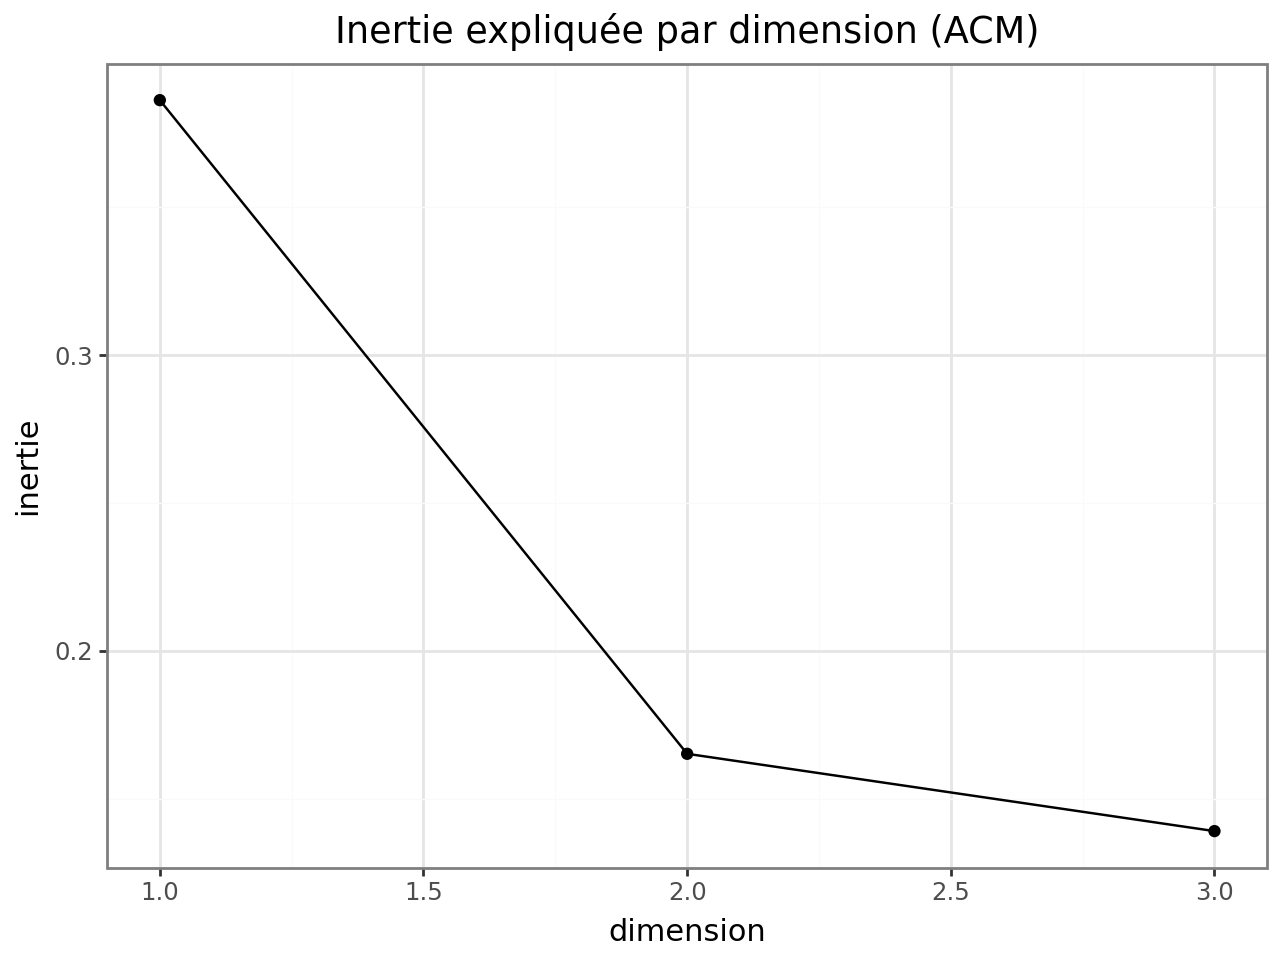

In [ ]:
# Inertie expliquée
eig = mca_fit.eigenvalues_
inertia_df = pd.DataFrame({
    "dimension": range(1, len(eig) + 1),
    "inertie": eig,
    "inertie_cumulee": np.cumsum(eig)
})

p_inertia = (
    ggplot(inertia_df, aes(x="dimension", y="inertie")) +
    geom_line() + geom_point() +
    theme_bw() +
    labs(title="Inertie expliquée par dimension (ACM)")
)

p_inertia

In [ ]:
contrib = mca.column_contributions_

contrib_12 = contrib.iloc[:, :2]
contrib_12.columns = ["Dim1", "Dim2"]

print("\nTop contributions – Dimension 1")
print(contrib_12["Dim1"].sort_values(ascending=False).head(15))

print("\nTop contributions – Dimension 2")
print(contrib_12["Dim2"].sort_values(ascending=False).head(15))


Top contributions – Dimension 1
conso_demat_films_bin__Non      0.094082
conso_demat_series_bin__Non     0.081971
conso_demat_mus_bin__Non        0.077907
conso_demat_jv_bin__Non         0.061512
conso_demat_photos_bin__Non     0.058292
conso_demat_logi_bin__Non       0.043049
conso_demat_livres_bin__Non     0.039464
conso_demat_presse_bin__Non     0.035932
conso_demat_retrans_bin__Non    0.031569
conso_demat_logi_bin__Oui       0.029867
conso_demat_jv_bin__Oui         0.029701
conso_demat_series_bin__Oui     0.028663
conso_demat_films_bin__Oui      0.028106
conso_demat_retrans_bin__Oui    0.027562
freq_demat_mus__Intensif        0.025736
Name: Dim1, dtype: float64

Top contributions – Dimension 2
freq_demat_films__Intensif       0.089902
freq_demat_jv__Intensif          0.069865
freq_demat_series__Intensif      0.066470
conso_demat_presse_bin__Oui      0.046292
freq_demat_livres__Intensif      0.041146
freq_demat_retrans__Intensif     0.040123
freq_demat_films__Occasionnel    0.03879

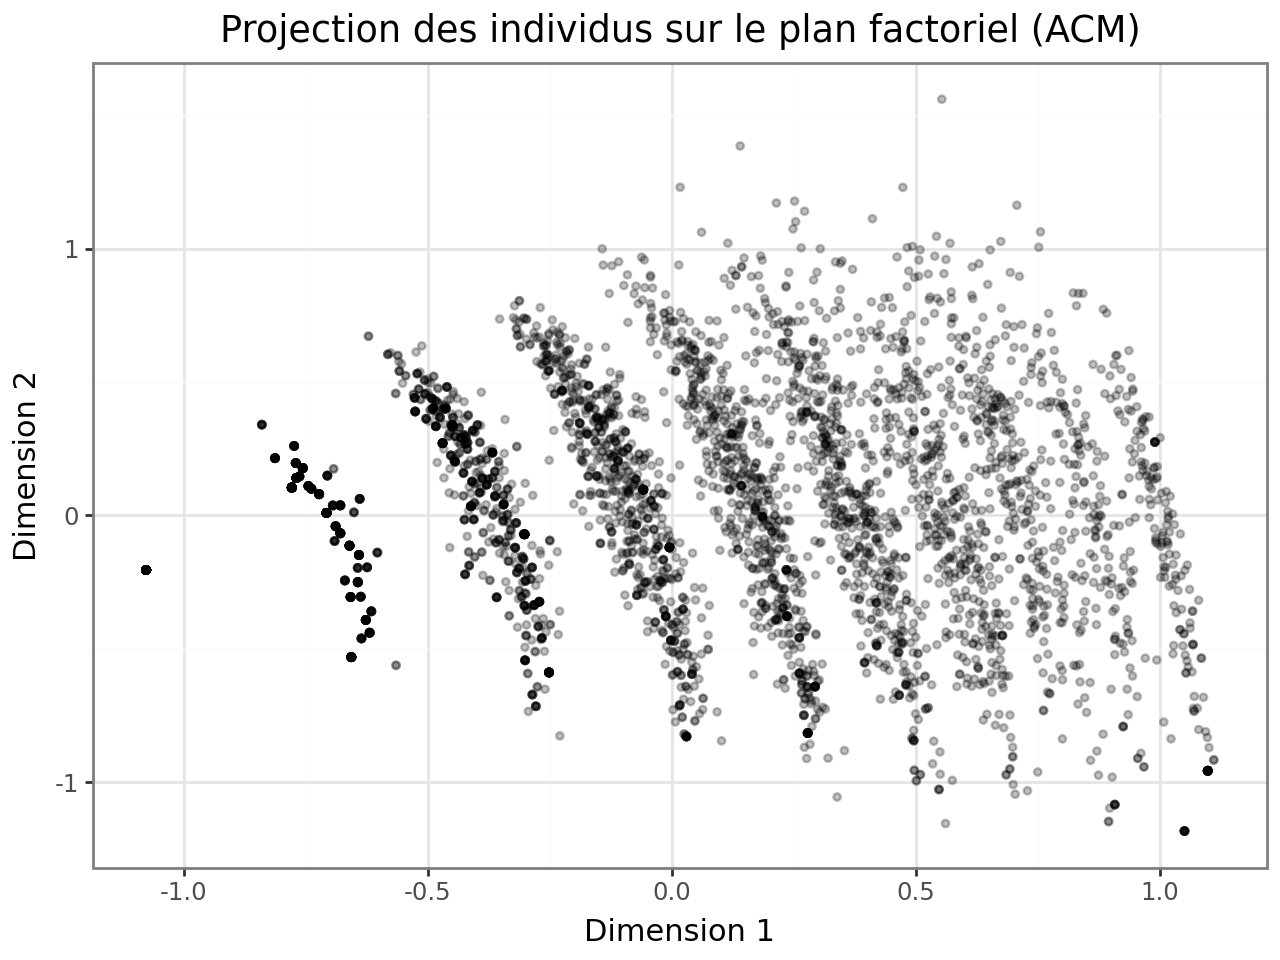

In [ ]:
# Coordonnées individuelles
coords = mca_fit.transform(df_barometre_recode[acm_vars])

ind = coords.iloc[:, :2].copy()
ind.columns = ["Dim1", "Dim2"]


p_ind = (
    ggplot(ind, aes(x="Dim1", y="Dim2")) +
    geom_point(alpha=0.25, size=1) +
    theme_bw() +
    labs(
        title="Projection des individus sur le plan factoriel (ACM)",
        x="Dimension 1",
        y="Dimension 2"
    )
)

p_ind


3 clusters
2    0.42
1    0.31
0    0.26
Name: proportion, dtype: float64

4 clusters
1    0.31
2    0.29
0    0.21
3    0.19
Name: proportion, dtype: float64

5 clusters
2    0.29
1    0.23
4    0.18
3    0.17
0    0.13
Name: proportion, dtype: float64
   k      inertia
0  2  1274.851336
1  3   834.014611
2  4   612.346485
3  5   483.631963
4  6   422.640646
5  7   357.984342
6  8   299.901520


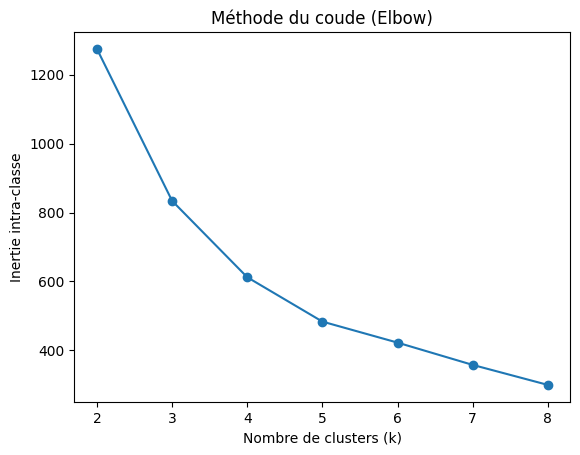

In [ ]:
X = coords.iloc[:, :2]  # Dim 1 et Dim 2 uniquement

inertia = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X)
    inertia.append(km.inertia_)
    if k in [3,4,5]:
        labels = km.fit_predict(X)
        print(f"\n{k} clusters")
        print(pd.Series(labels).value_counts(normalize=True).round(2))


elbow_df = pd.DataFrame({"k": K, "inertia": inertia})
print(elbow_df)


plt.figure()
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie intra-classe")
plt.title("Méthode du coude (Elbow)")
plt.show()

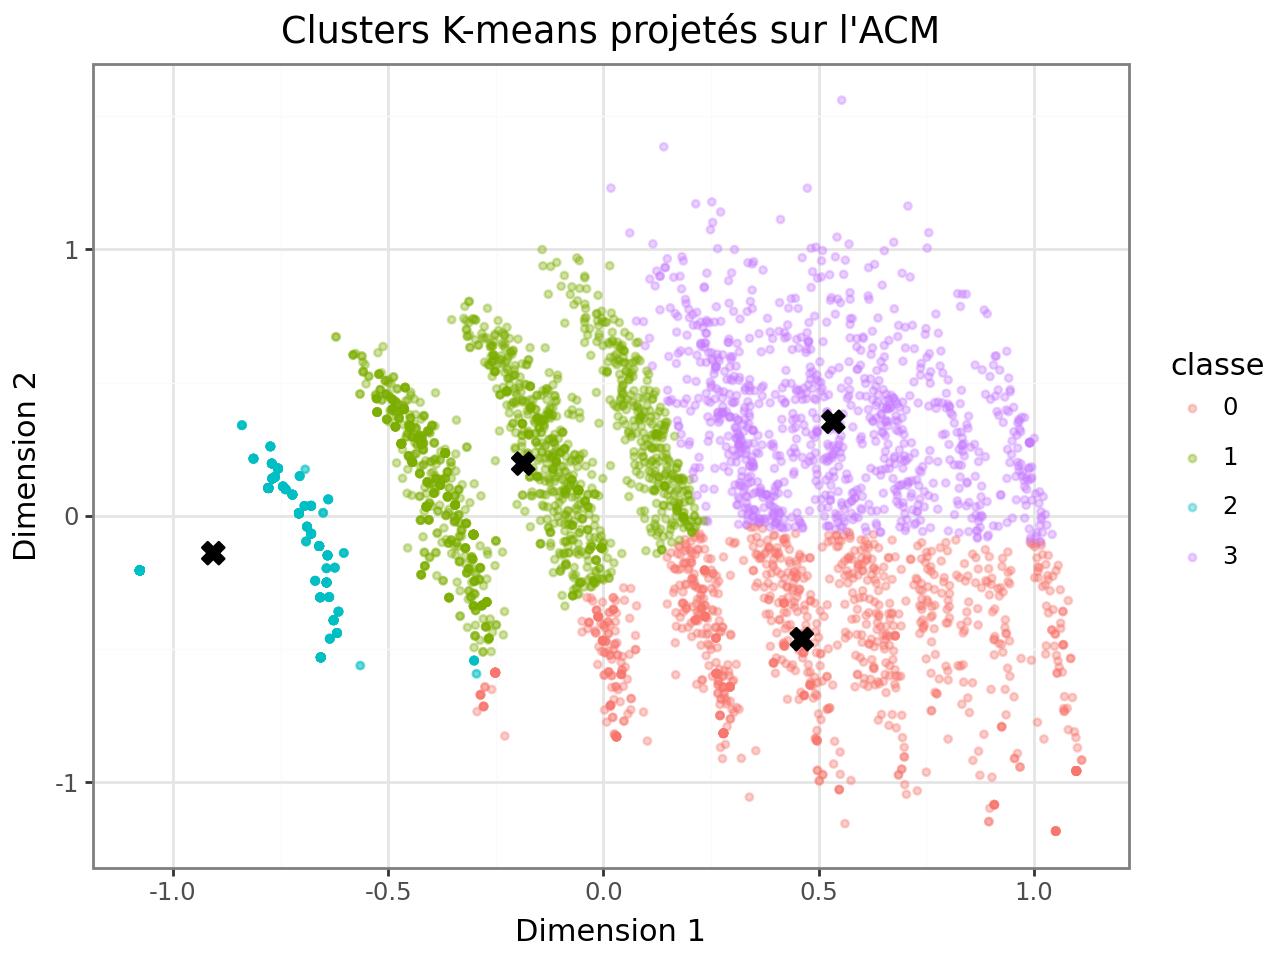

In [ ]:
X = coords.iloc[:, :2].copy()
X.columns = ["Dim_1", "Dim_2"]

kmeans = KMeans(n_clusters=4, random_state=42)
df_barometre_recode["classe"] = kmeans.fit_predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids["classe"] = centroids.index.astype("category")

plot_df = X.copy()
plot_df["classe"] = df_barometre_recode["classe"].astype("category")

p = (
    ggplot(plot_df, aes("Dim_1", "Dim_2", color="classe")) +
    geom_point(alpha=0.35, size=1) +
    geom_point(data=centroids, mapping=aes("Dim_1", "Dim_2"),
               color="black", size=4, shape="X") +
    theme_bw() +
    labs(title="Clusters K-means projetés sur l'ACM",
         x="Dimension 1", y="Dimension 2")
)

p

### ACM et CLUSTERING sur pratiques d'écoutes

In [ ]:
genre = ["var_fr", "poprock", "rap", "classique", "jazz", "dance", "electro", "metal", "rnb", "soul", "reggae", "musique_monde"]

for col in pratiques:
    df_barometre_recode[col + "_bin"] = np.where(df_barometre_recode[col].notna() & (df_barometre_recode[col] != 0), "Oui", "Non")


# Variables de pratiques uniquement
acm_vars = [c for c in df_barometre_recode.columns if c.endswith("_bin") or c.startswith("freq_")]
print("Variables actives ACM :", acm_vars)
print(df_barometre_recode[acm_vars].head())

mca = MCA(n_components=3,random_state=42)

mca_fit = mca.fit(df_barometre_recode[acm_vars])